In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import random

In [ ]:
df = pd.read_csv('/home/edvin/Desktop/flib/AMLsim/paramFiles/100K_accts/degree.csv')
df.head()

In [ ]:
df['deg'] = df['In-degree'] + df['Out-degree']

In [ ]:
# calc ratio of In-degree to Out-degree
df['ratio'] = df['In-degree'] / df['Out-degree']
df.head()

In [ ]:
rations = []
for row in df.itertuples():
    rations += row.Count * [row.ratio]

rations = [r for r in rations if r != np.inf]
rations = sorted(rations)
dist = np.histogram(rations, bins=300)


In [ ]:
# plot dist as bar plot
plt.bar(dist[1][:-1], dist[0], width=0.1)
plt.xlim(-1, 3)
plt.show()

In [ ]:
plt.hist(rations, bins=300)
plt.xlim(-1, 3)
plt.show()

In [ ]:
degs = []
for row in df.itertuples():
    degs += row.Count * [row._3] if not row._3 == 0 else []
plt.hist(degs, bins=300)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
d = 100
x = np.random.randint(0, d-10, 100000)
y = x/(d-x+0.0001)
y = y[y > 1]
plt.hist(y, bins=100)
#plt.yscale('log')
plt.show()


In [ ]:
ds = np.arange(1, 21)
rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, range=(0,20), bins=200)
plt.xlim(4, 6)
plt.ylim(0, 4)
plt.ylabel('number of possible occurences')
plt.xlabel('ratio')
plt.show()
        

In [ ]:
ds = np.random.randint(1, 201, 10000)
rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, range=(0,20), bins=200)
plt.xlim(-1, 21)
plt.show()

In [ ]:
gamma = 2.0
loc = 1.0
scale = 1.0
n = 100000
ds = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()

rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, range=(0,20), bins=200)
plt.xlim(-1, 21)
plt.show()

In [ ]:
#ds = []
#for row in df.itertuples():
#    ds += row.Count * [row.deg] if not row.deg == 0 else []
gamma = 0.8
loc = 1.0
scale = 1.0
n = 100000
ds = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()

rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]

plt.hist(rs, range=(0,20), bins=200)
plt.xlim(-1, 21)
plt.show()

In [ ]:
gammas = [2.0]
loc = 1.0
scale = 1.0
n = 100000

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for gamma in gammas:
    in_degrees = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()
    out_degrees = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=43).round()
    in_degrees = in_degrees // 2
    out_degrees = out_degrees // 2
    
    if (in_degrees.sum() + out_degrees.sum()) % 2 != 0:
        if in_degrees.sum() > out_degrees.sum():
            rand_idx = np.random.choice(np.where(in_degrees > 0)[0])
            in_degrees[rand_idx] -= 1
        else:
            rand_idx = np.random.choice(np.where(out_degrees > 0)[0])
            out_degrees[rand_idx] -= 1
    
    i = 0
    while in_degrees.sum() != out_degrees.sum() and i < 10000:
        if in_degrees.sum() > out_degrees.sum():
            rand_idx = np.random.choice(np.where(in_degrees > 1)[0])
            in_degrees[rand_idx] -= 1
            out_degrees[rand_idx] += 1
        else:
            rand_idx = np.random.choice(np.where(out_degrees > 1)[0])
            in_degrees[rand_idx] += 1
            out_degrees[rand_idx] -= 1
        i += 1
    
    if in_degrees.sum() != out_degrees.sum():
        if in_degrees.sum() > out_degrees.sum():
            diff = in_degrees.sum() - out_degrees.sum()
            assert diff % 2 == 0
            in_degrees[np.argmax(in_degrees)] -= diff / 2
            out_degrees[np.argmax(out_degrees)] += diff / 2
        elif in_degrees.sum() < out_degrees.sum():
            diff = out_degrees.sum() - in_degrees.sum()
            assert diff % 2 == 0
            in_degrees[np.argmax(in_degrees)] += diff / 2
            out_degrees[np.argmax(out_degrees)] -= diff / 2
    
    in_out_degrees = np.column_stack((in_degrees, out_degrees))
    in_out_degrees = in_out_degrees[~(in_out_degrees == 0).any(axis=1)]
    in_degrees = in_out_degrees[:, 0]
    out_degrees = in_out_degrees[:, 1]
    
    ds = in_degrees + out_degrees
    rs = in_degrees / out_degrees
    axs[0].hist(rs, range=(0,20), bins=200, alpha=0.5, label=f'gamma={gamma}')
    
    n_nodes, degrees = np.unique(ds, return_counts=True)
    axs[1].scatter(n_nodes, degrees, alpha=0.5, label=f'gamma={gamma}')

axs[0].set_xlim(-1, 21)
axs[0].legend()
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('degree')
axs[1].set_ylabel('counts')
axs[1].legend()
plt.show()


In [ ]:
gammas = [0.5, 2.0]
loc = 1.0
scale = 1.0
n = 100000

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for gamma in gammas:
    
    degrees = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()
    if degrees.sum() % 2 == 1:
        degrees[np.random.randint(n)] += 1
    split = np.random.rand(n)
    in_degrees = (degrees*split).round()
    out_degrees = (degrees*(1-split)).round()
    iters = 0
    while in_degrees.sum() != out_degrees.sum() and iters < 10000:
        if in_degrees.sum() > out_degrees.sum():
            idx = np.random.choice(np.where(in_degrees > 1.0)[0])
            in_degrees[idx] -= 1
            out_degrees[np.random.randint(n)] += 1
        else:
            idx = np.random.choice(np.where(out_degrees > 1.0)[0])
            in_degrees[np.random.randint(n)] += 1
            out_degrees[idx] -= 1
        iters += 1
    if in_degrees.sum() > out_degrees.sum():
        diff = in_degrees.sum() - out_degrees.sum()
        assert diff % 2 == 0
        in_degrees[np.argmax(in_degrees)] -= diff / 2
        out_degrees[np.argmax(out_degrees)] += diff / 2
    elif in_degrees.sum() < out_degrees.sum():
        diff = out_degrees.sum() - in_degrees.sum()
        assert diff % 2 == 0
        in_degrees[np.argmax(in_degrees)] += diff / 2
        out_degrees[np.argmax(out_degrees)] -= diff / 2
    
    in_out_degrees = np.column_stack((in_degrees, out_degrees))
    in_out_degrees = in_out_degrees[~(in_out_degrees == 0).any(axis=1)]
    in_degrees = in_out_degrees[:, 0]
    out_degrees = in_out_degrees[:, 1]

    ds = in_degrees + out_degrees
    rs = in_degrees / out_degrees
    axs[0].hist(rs, range=(0,20), bins=200, alpha=0.5, label=f'gamma={gamma}')
    
    n_nodes, degrees = np.unique(ds, return_counts=True)
    axs[1].scatter(n_nodes, degrees, alpha=0.5, label=f'gamma={gamma}')

axs[0].set_xlim(-1, 21)
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_xlabel('ratio')
axs[0].set_ylabel('counts')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('degree')
axs[1].set_ylabel('counts')
axs[1].grid()
axs[1].legend()
plt.show()

In [ ]:
if (in_degrees.sum() + out_degrees.sum()) % 2 != 0:
    if in_degrees.sum() > out_degrees.sum():
        rand_idx = np.random.choice(np.where(in_degrees > 0)[0])
        in_degrees[rand_idx] -= 1
    else:
        rand_idx = np.random.choice(np.where(out_degrees > 0)[0])
        out_degrees[rand_idx] -= 1

i = 0
while in_degrees.sum() != out_degrees.sum() and i < 100000:
    if in_degrees.sum() > out_degrees.sum():
        rand_idx = np.random.choice(np.where(in_degrees > 1)[0])
        in_degrees[rand_idx] -= 1
        out_degrees[rand_idx] += 1
    else:
        rand_idx = np.random.choice(np.where(out_degrees > 1)[0])
        in_degrees[rand_idx] += 1
        out_degrees[rand_idx] -= 1
    i += 1

if in_degrees.sum() != out_degrees.sum():
    if in_degrees.sum() > out_degrees.sum():
        diff = in_degrees.sum() - out_degrees.sum()
        assert diff % 2 == 0
        in_degrees[np.argmax(in_degrees)] -= diff / 2
        out_degrees[np.argmax(out_degrees)] += diff / 2
    elif in_degrees.sum() < out_degrees.sum():
        diff = out_degrees.sum() - in_degrees.sum()
        assert diff % 2 == 0
        in_degrees[np.argmax(in_degrees)] += diff / 2
        out_degrees[np.argmax(out_degrees)] -= diff / 2
    
print(in_degrees.sum(), out_degrees.sum())

In [ ]:
rs = in_degrees / out_degrees
plt.hist(rs, bins=300)
plt.xlim(-1, 20)
#plt.yscale('log')
plt.show()


In [ ]:
ds = in_degrees + out_degrees
rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, bins=len(np.unique(rs)))
plt.xlim(-1, 10)
plt.show()

In [ ]:
gamma = 2.0
loc = 1.0
scale = 1.0
n = 100000

degrees = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()
    
# if degree sum is odd, add one to a random degree
if degrees.sum() % 2 == 1:
    degrees[np.random.randint(n)] += 1
split = np.random.rand(n)

in_degrees = (degrees*split).round()
out_degrees = (degrees*(1-split)).round()

iters = 0
while in_degrees.sum() != out_degrees.sum() and iters < 100000:
    if in_degrees.sum() > out_degrees.sum():
        idx = np.random.choice(np.where(in_degrees > 1.0)[0])
        in_degrees[idx] -= 1
        out_degrees[np.random.randint(n)] += 1
    else:
        idx = np.random.choice(np.where(out_degrees > 1.0)[0])
        in_degrees[np.random.randint(n)] += 1
        out_degrees[idx] -= 1
    iters += 1
if in_degrees.sum() > out_degrees.sum():
    diff = in_degrees.sum() - out_degrees.sum()
    assert diff % 2 == 0
    in_degrees[np.argmax(in_degrees)] -= diff / 2
    out_degrees[np.argmax(out_degrees)] += diff / 2
elif in_degrees.sum() < out_degrees.sum():
    diff = out_degrees.sum() - in_degrees.sum()
    assert diff % 2 == 0
    in_degrees[np.argmax(in_degrees)] += diff / 2
    out_degrees[np.argmax(out_degrees)] -= diff / 2

print(in_degrees.sum(), out_degrees.sum())

In [ ]:
in_out_degrees = np.column_stack((in_degrees, out_degrees))
in_out_degrees = in_out_degrees[~(in_out_degrees == 0).any(axis=1)]
in_degrees = in_out_degrees[:, 0]
out_degrees = in_out_degrees[:, 1]
rs = in_degrees / out_degrees
plt.hist(rs, bins=len(np.unique(rs)))
plt.xlim(-1, 10)
#plt.yscale('log')
plt.show()

In [ ]:
ds = in_degrees + out_degrees
rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, bins=len(np.unique(rs)))
plt.xlim(-1, 10)
plt.show()

In [ ]:
df = pd.read_csv('/home/edvin/Desktop/flib/AMLsim/outputs/100K_accts/tx_log.csv')
df.head()

In [ ]:
df = df[df['bankOrig'] != 'source']
df = df[df['bankDest'] != 'sink']
df.head()

In [ ]:
len(pd.unique(df[['nameOrig', 'nameDest']].values.ravel('K')))

In [ ]:
out_degs = df['nameOrig'].value_counts()
in_degs = df['nameDest'].value_counts()
degs = pd.concat([in_degs, out_degs], axis=1).fillna(0)
in_out_degs = degs.to_numpy()
in_out_degs = in_out_degs[~(in_out_degs == 0).any(axis=1)]

in_degs = in_out_degs[:, 0]
out_degs = in_out_degs[:, 1]

rs = in_degs / out_degs
plt.hist(rs, range=(0,20), bins=200)
plt.xlim(-1, 21)
plt.show()


In [ ]:
accts = [f'{i}' for i in range(100000)]
p = 0.4
sar_participation = {0: accts}
n_patterns = 200
n_members = 10
e = 0.000001

for pattern in range(n_patterns):
    
    members = []
    
    for m in range(n_members):
        bin = 0
        while random.random() > scipy.stats.logser.cdf(bin+1, p): # random.random() > 1 + scipy.special.beta(bin+2-e, 0+e) * scipy.special.betainc(p, bin+2-e, 0+e) / np.log(1-p): # random.random() < -p**(bin+2)/((bin+2)*np.log(1-p)): # TODO: cumelative and bigger then
            if bin+1 not in sar_participation:
                break
            elif all([candidate in members for candidate in sar_participation[bin+1]]):
                break
            else:
                bin += 1
        candidates = [candidate for candidate in sar_participation[bin] if candidate not in members]
        member = random.sample(candidates, 1)[0]
        members.append(member)
    
    for member in members:
        bins = list(sar_participation.keys())
        for bin in bins:
            if member in sar_participation[bin]:
                if bin+1 not in sar_participation:
                    sar_participation[bin+1] = [member]
                else:
                    sar_participation[bin+1].append(member)
                sar_participation[bin].remove(member)
                break

n_sar_accts = sum([len(sar_participation[bin]) for bin in range(1, len(sar_participation))])

for k in range(1, len(sar_participation)):
    print(f'bin: {k}, size: {len(sar_participation[k])}, members: {sar_participation[k]}')
    
    pmf = -p**k / (k * np.log(1-p))
    frac = len(sar_participation[k]) / n_sar_accts
    
    print(f'pmf: {pmf}, frac: {frac}\n')
    
    




In [2]:
df_SWB = pd.read_csv('../outputs/only_sar_SWB.csv')
df_SHB = pd.read_csv('../outputs/only_sar_SHB5.csv')

In [3]:
display(df_SWB)
display(df_SHB)

,step,amount,nameOrig,bankOrig,nameDest,bankDest
0,0,1186.76,31621,handelsbanken,31936,handelsbanken
1,0,52.51,3342,swedbank,20245,swedbank
2,0,285.56,35012,handelsbanken,39993,handelsbanken
3,0,939.60,89831,others,63225,others
4,0,1733.97,52132,others,82308,others
...,...,...,...,...,...,...
22051,359,279.18,19877,swedbank,14643,swedbank
22052,360,662.83,12555,swedbank,14643,swedbank
22053,360,1052.62,17929,swedbank,24359,swedbank
22054,361,290.78,31846,handelsbanken,32720,handelsbanken


,step,amount,nameOrig,bankOrig,nameDest,bankDest
0,0,930.11,31621,handelsbanken,31936,handelsbanken
1,0,689.35,3342,swedbank,20245,swedbank
2,0,495.97,35012,handelsbanken,39993,handelsbanken
3,0,696.89,89831,others,63225,others
4,0,1096.56,52132,others,82308,others
...,...,...,...,...,...,...
20574,359,503.95,37081,handelsbanken,37625,handelsbanken
20575,359,536.92,19877,swedbank,14643,swedbank
20576,360,519.49,12555,swedbank,14643,swedbank
20577,360,469.09,17929,swedbank,24359,swedbank


In [4]:
mean_amount_SWB = df_SWB['amount'].mean()
std_amount_SWB = df_SWB['amount'].std()
mean_amount_SHB = df_SHB['amount'].mean()
std_amount_SHB = df_SHB['amount'].std()
print(mean_amount_SWB, std_amount_SWB)
print(mean_amount_SHB, std_amount_SHB)

840.9222751178817 409.9404096781666
808.80311628359 423.00556884543215


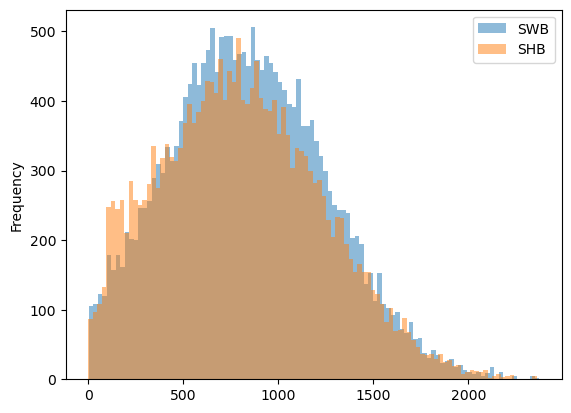

In [5]:
df_SWB['amount'].plot.hist(bins=100, alpha=0.5, label='SWB')
df_SHB['amount'].plot.hist(bins=100, alpha=0.5, label='SHB')
plt.legend()

In [ ]:
df_SWB_struc = df_SWB[['step', 'nameOrig', 'nameDest']]
df_SHB_struc = df_SHB[['step', 'nameOrig', 'nameDest']]

# check 
# Merge df1 with df2 with an indicator
merged_df = df_SWB_struc.merge(df_SHB_struc, on=['step', 'nameOrig', 'nameDest'], how='left', indicator=True)

# Check which rows from df1 are in df2
merged_df['exists_in_df_SHB'] = merged_df['_merge'] == 'both'
display(merged_df)

n_matches = merged_df['exists_in_df_SHB'].sum()
n_diffs = len(merged_df) - n_matches
print(f'matches: {n_matches}, diffs: {n_diffs}')

df_diffs = merged_df[merged_df['exists_in_df_SHB'] == False]
print(df_diffs['step'].min(), df_diffs['step'].max())

In [ ]:
df_SWB_struc = df_SWB[['step', 'nameOrig', 'nameDest']]
df_SHB_struc = df_SHB[['step', 'nameOrig', 'nameDest']]

# check 
# Merge df1 with df2 with an indicator
merged_df = df_SHB_struc.merge(df_SWB_struc, on=['step', 'nameOrig', 'nameDest'], how='left', indicator=True)

# Check which rows from df1 are in df2
merged_df['exists_in_df_SHB'] = merged_df['_merge'] == 'both'
display(merged_df)

n_matches = merged_df['exists_in_df_SHB'].sum()
n_diffs = len(merged_df) - n_matches
print(f'matches: {n_matches}, diffs: {n_diffs}')

df_diffs = merged_df[merged_df['exists_in_df_SHB'] == False]
print(df_diffs['step'].min(), df_diffs['step'].max())

In [ ]:
df = pd.read_csv('/home/edvin/Desktop/flib/AMLsim/outputs/100K_accts/tx_log.csv')
df.columns

In [ ]:
df_balance = df[['step', 'oldbalanceOrig']]
gb = df_balance.groupby('step')
df_balance = gb.mean().reset_index()
df_balance.plot(x='step', y=['oldbalanceOrig'])